In [1]:
import pandas as pd

In [2]:
import scipy.stats as st

In [10]:
file = "/Users/Lenovo/notebooks/RawDataChickenRetail.csv"

## All Columns

In [11]:
chicken = pd.read_csv(file)
chicken.head()

,Lab,SampleNumber,DateExamined,BoxTempNoOnReceipt,Retailer,OtherPremisesDetails,PostCode,Country,UseByDate,RemainingShelflifeDays,...,TypeOfChickenExtraDetails,TypeOfChickenExtraDetails2,PackagingAtmosphere,RoastInBag,LiquidInPack,NeckSkinWeightGrams,Test,Result,Units,SpeciesDetected
0,BI,BI1515854-01,2015-07-13,6.3,Tesco,NaN,B73 6RB,England,2015-07-19,6.0,...,None Stated,NaN,NOT Modified Atmosphere,Not Roast in bag,No,25.0,Campylobacter spp - enumeration cfu/g,390,CFU/g,C. jejuni
1,BI,BI1515854-01,2015-07-13,6.3,Tesco,NaN,B73 6RB,England,2015-07-19,6.0,...,None Stated,NaN,NOT Modified Atmosphere,Not Roast in bag,No,25.0,Campylobacter spp - enumeration per Swab,<10,CFU Swab,NaN
2,BI,BI1515854-02,2015-07-13,6.3,Tesco,NaN,B73 6RB,England,2015-07-20,7.0,...,None Stated,NaN,NOT Modified Atmosphere,Not Roast in bag,No,25.0,Campylobacter spp - enumeration cfu/g,3350,CFU/g,C. jejuni
3,BI,BI1515854-02,2015-07-13,6.3,Tesco,NaN,B73 6RB,England,2015-07-20,7.0,...,None Stated,NaN,NOT Modified Atmosphere,Not Roast in bag,No,25.0,Campylobacter spp - enumeration per Swab,<10,CFU Swab,NaN
4,BI,BI1515854-03,2015-07-13,6.3,M&S,NaN,B73 6RB,England,2015-07-18,5.0,...,None Stated,NaN,NOT Modified Atmosphere,Not Roast in bag,Yes,18.0,Campylobacter spp - enumeration cfu/g,7500,CFU/g,C. jejuni


## categorical X categorical

In [12]:
from scipy.stats import chi2_contingency as chi2_c

### Retailer vs LiquidInPack

I expect there to be no correlation between the liquid in the pack and the retailer

In [17]:
continRetailLiquid = chicken.groupby(['Retailer', 'LiquidInPack']).size().unstack('Retailer', fill_value=0)
continRetailLiquid

Retailer,ALDI,ASDA,Aldi,Aldi,Asda,BUTCHERS,Butchers,CO-OP,Co-Op,Co-op,...,M&S,MORRISONS,Morrisons,OTHER,Other,Sainsbury's,TESCO,Tesco,WAITROSE,Waitrose
LiquidInPack,,,,,,,,,,,,,,,,,,,,,
No,52,64,110,0,74,4,186,56,52,176,...,344,2,160,33,113,170,32,188,8,60
Yes,152,204,296,4,268,0,32,48,40,188,...,268,6,432,26,118,448,81,321,124,391
no,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='LiquidInPack'>

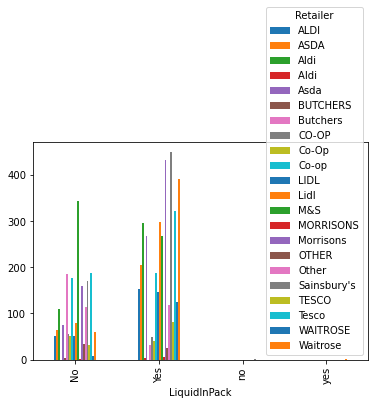

In [18]:
continRetailLiquid.plot.bar()

In [19]:
chi2_c(continRetailLiquid)

(783.3702263630936,
 7.005089590945418e-125,
 63,
 array([[6.94967829e+01, 9.12996952e+01, 1.38312225e+02, 1.36268202e+00,
         1.16509313e+02, 1.36268202e+00, 7.42661700e+01, 3.54297325e+01,
         3.13416864e+01, 1.24004064e+02, 6.67714189e+01, 1.28092110e+02,
         2.08490349e+02, 2.72536404e+00, 2.01676939e+02, 2.00995598e+01,
         7.86948866e+01, 2.11215713e+02, 3.84957670e+01, 1.73401287e+02,
         4.49685066e+01, 1.53983068e+02],
        [1.34399594e+02, 1.76564172e+02, 2.67481544e+02, 2.63528615e+00,
         2.25316966e+02, 2.63528615e+00, 1.43623095e+02, 6.85174399e+01,
         6.06115814e+01, 2.39811040e+02, 1.29129021e+02, 2.47716898e+02,
         4.03198781e+02, 5.27057230e+00, 3.90022350e+02, 3.88704707e+01,
         1.52187775e+02, 4.08469353e+02, 7.44468337e+01, 3.35340163e+02,
         8.69644429e+01, 2.97787335e+02],
        [6.90822892e-02, 9.07551642e-02, 1.37487301e-01, 1.35455469e-03,
         1.15814426e-01, 1.35455469e-03, 7.38232306e-02, 3.5218

### country vs RoastInBag

In [22]:
continCountryRoast = chicken.groupby(['Country', 'RoastInBag']).size().unstack('Country', fill_value=0)
continCountryRoast

Country,England,Northern Ireland,Scotland,Wales
RoastInBag,,,,
"No tray, wrapped",2,0,0,0
Not Roast in bag,444,0,0,56
Other,3552,40,202,452
Other,0,28,20,0
Roast in bag,750,0,110,66
Tray Wrapped,4,0,0,0


<AxesSubplot:xlabel='RoastInBag'>

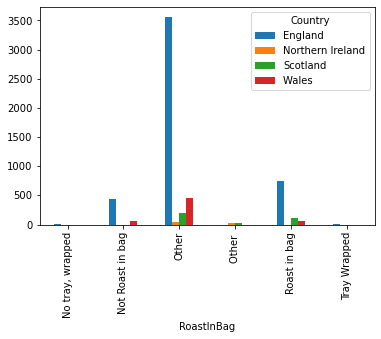

In [23]:
continCountryRoast.plot.bar()

In [24]:
chi2_c(continCountryRoast)

(1600.1647125598308,
 0.0,
 15,
 array([[1.65979742e+00, 2.37513098e-02, 1.15962277e-01, 2.00488998e-01],
        [4.14949354e+02, 5.93782745e+00, 2.89905693e+01, 5.01222494e+01],
        [3.52374991e+03, 5.04240307e+01, 2.46187915e+02, 4.25638142e+02],
        [3.98351380e+01, 5.70031436e-01, 2.78309466e+00, 4.81173594e+00],
        [7.68486203e+02, 1.09968564e+01, 5.36905344e+01, 9.28264059e+01],
        [3.31959483e+00, 4.75026196e-02, 2.31924555e-01, 4.00977995e-01]]))